In [5]:
# A cell to run functions directly.
using Reexport
using Distributions
using Statistics
using GeoStats
using Random
using DataFrames
import GLMakie as Mke
using Infiltrator
using AbstractGPs
using Unitful
using Plots
using DataStructures
using POMDPs
include("../src/config.jl");
include("../src/pomdp.jl")
pomdp = CCSPOMDP();

FEATURE = :topSealThickness


:topSealThickness

In [2]:
visualize_gt(pomdp, 2)

### Test: Action function returns all actions

In [3]:
all_actions = POMDPs.actions(pomdp);

### Test: Observation function returns correct distributions

1 z (100, 100) 5.849515353183782e10
1 permeability (100, 100) 12.250928044567903
1 topSealThickness (100, 100) 4.22176242849373e6
2 z (100, 100) 9.597474509189636e11
2 permeability (100, 100) 12.250928044567903
2 topSealThickness (100, 100) 4.0607974943575333e6
3 z 1 [199.99999999999983, 199.99999999999952, 199.9999999999986, 199.99999999999582, 199.9999999999875, 199.9999999999628, 199.9999999998894, 199.99999999967207, 199.99999999902982, 199.999999997137, 199.99999999157433, 199.9999999752765, 199.9999999276842, 199.99999978920675, 199.9999993878641, 199.99999822966564, 199.9999949031029, 199.99998539842213, 199.99995839886952, 199.9998821985951, 199.99966870458374, 199.99907547587256, 199.9974425963675, 199.992996764282, 199.98104487179933, 199.94939162058043, 199.86704659764732, 199.6574108964382, 199.13767789509586, 197.89088038595602, 195.02151543979596, 188.7629772023249, 176.08206539436503, 153.2563948920204, 121.89567742110661, 107.8021087978971, 126.88883521274192, 139.22498

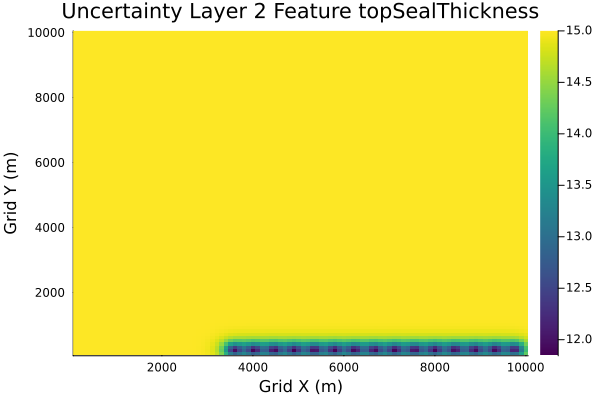

In [6]:
# Taking a seismic line action first
distr = POMDPs.observation(pomdp, all_actions[21], pomdp.state)
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[21])
println(typeof(distr), "\nReward: ", reward)

visualize_uncertainty(pomdp, 2, FEATURE)

In [5]:
pomdp.rocktype_belief

5-element Vector{Distributions.Categorical{Float64, Vector{Float64}}}:
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])

In [6]:
distr = POMDPs.observation(pomdp, all_actions[2], pomdp.state);
pomdp.rocktype_belief

5-element Vector{Distributions.Categorical{Float64, Vector{Float64}}}:
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 1.0, 0.0])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 0.0, 1.0])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0])

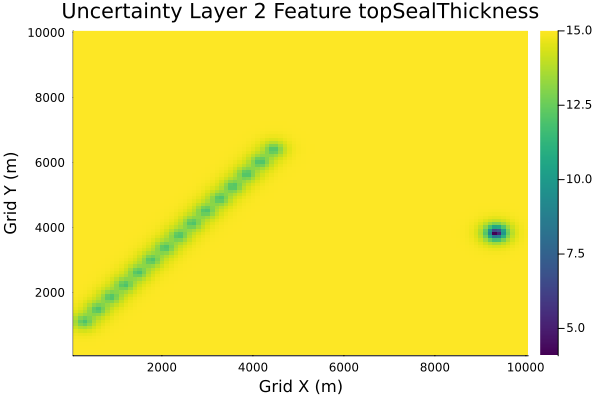

In [7]:
visualize_uncertainty(pomdp, 2, FEATURE)

Information Gain: 1.9408089492500305e8
  1.387160 seconds (19.96 M allocations: 975.110 MiB, 6.73% gc time, 2.94% compilation time)
Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Distributions.Continuous, MvNormal, Distributions.Categorical{Float64, Vector{Float64}}}}, Distributions.Continuous, Float64}
Reward: 2.4408089492500307


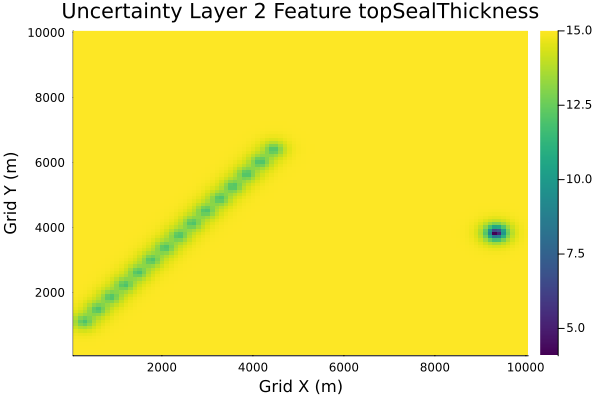

In [8]:
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[2])
println(typeof(distr), "\nReward: ", reward)

visualize_uncertainty(pomdp, 2, FEATURE)

Information Gain: 1.8235724864911957e9
  2.413268 seconds (37.82 M allocations: 1.661 GiB, 5.15% gc time)
Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Distributions.Continuous, MvNormal, Distributions.Categorical{Float64, Vector{Float64}}}}, Distributions.Continuous, Float64}
Reward: 17.73572486491196


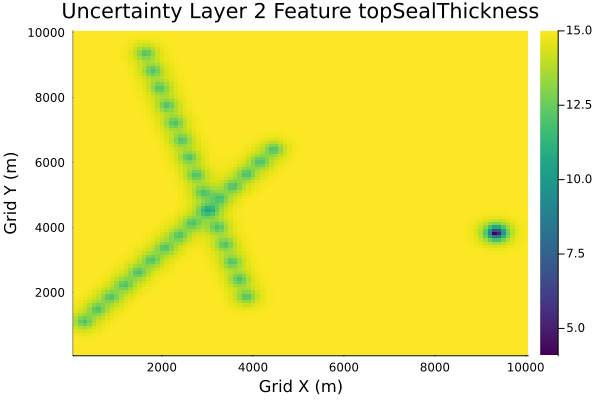

In [9]:
# Timing test for seismic line observation and reward function
distr = POMDPs.observation(pomdp, all_actions[19], pomdp.state)
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[19])
println(typeof(distr), "\nReward: ", reward)
visualize_uncertainty(pomdp, 2, FEATURE)

Information Gain: 1.8283090780801392e8
  2.520557 seconds (39.62 M allocations: 1.732 GiB, 5.41% gc time)
Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Distributions.Continuous, MvNormal, Distributions.Categorical{Float64, Vector{Float64}}}}, Distributions.Continuous, Float64}
Reward: 2.328309078080139


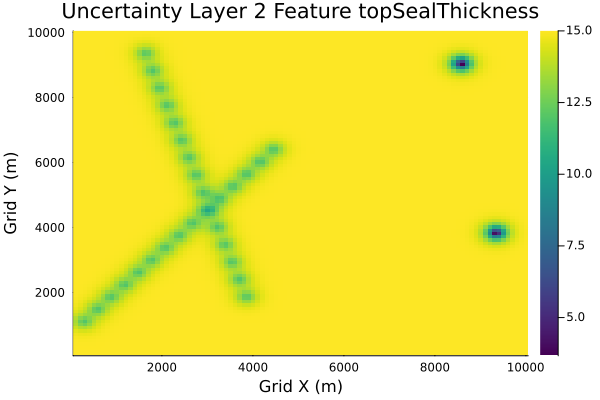

In [10]:
# Timing test for well log observation and reward function
distr = POMDPs.observation(pomdp, all_actions[1], pomdp.state)
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[1])
println(typeof(distr), "\nReward: ", reward)
visualize_uncertainty(pomdp, 2, FEATURE)